In [65]:
import random
import gensim
import nltk
import codecs
import pymorphy2
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as pp

morph = pymorphy2.MorphAnalyzer()

In [66]:
filename = "ruscorpora_upos_skipgram_300_5_2018.vec"
path = "/home/katty/Загрузки/" + filename
model = gensim.models.KeyedVectors.load_word2vec_format(path)

In [67]:
text = codecs.open("/home/katty/anaconda3/_nlp/project_hp/corp/6.txt", "r", "utf-8").read()

In [68]:
normal_text = []
for word in nltk.tokenize.word_tokenize(text):
    if word.isalpha():
        morph_res = morph.parse(word.lower())[0]
        normal_text.append(morph_res.normal_form + "_" + str(morph_res.tag).split(",")[0])

print(normal_text[:10])

['annotation_LATN', 'министерство_NOUN', 'магия_NOUN', 'терпеть_VERB', 'поражение_NOUN', 'за_PREP', 'поражение_NOUN', 'в_PREP', 'битва_NOUN', 'с_PREP']


In [69]:
counter_non_words = 0
mx = []
using_words = []
for word in normal_text:
    try:
        vector = model.get_vector(word)
        mx.append(vector)
        using_words.append(word)
    except KeyError:
        counter_non_words += 1

print(len(normal_text), len(using_words), counter_non_words)

146293 51162 95131


In [70]:
vis_scaler = StandardScaler()
vis_pca = PCA(2)
t_scales = vis_scaler.fit_transform(mx)
print("Scales done!")
t_2 = vis_pca.fit_transform(t_scales)
print("PCA done!")


Scales done!
PCA done!


In [71]:
kmeans = KMeans(4)

cluster = kmeans.fit_predict(t_2)

[[-0.37594878 -0.97269716]
 [15.38218917  0.74143877]
 [-1.57777561  3.76938066]
 [-1.3279903  -5.13429898]]


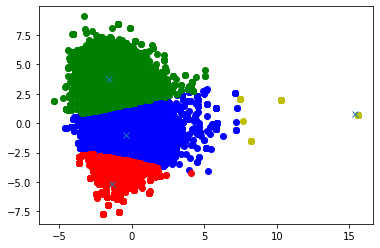

In [72]:

t_first = t_2[cluster == 0, :]
t_second = t_2[cluster == 1, :]
t_third = t_2[cluster == 2, :]
t_fourth = t_2[cluster == 3, :]

# хотела вытащить центроидные слова, но пока сложно
centers = kmeans.cluster_centers_
print(centers)

pp.plot(t_first[:, 0], t_first[:, 1], 'ob')
pp.plot(t_second[:, 0], t_second[:, 1], 'oy')
pp.plot(t_third[:, 0], t_third[:, 1], 'og')
pp.plot(t_fourth[:, 0], t_fourth[:, 1], 'or')
pp.plot(centers[:, 0], centers[:, 1], 'x')
#pp.xlim([-3, 3])
#pp.ylim([-3, 3])

In [73]:
cls_1 = []
cls_2 = []
cls_3 = []
cls_4 = []
for i in range(len(using_words)):
    if cluster[i] == 2:
        cls_3.append(using_words[i])
    elif cluster[i] == 1:
        cls_2.append(using_words[i])
    elif cluster[i] == 0:
        cls_1.append(using_words[i])
    elif cluster[i] == 3:
        cls_4.append(using_words[i])

print("Размеры кластеров:", len(cls_1), len(cls_2), len(cls_3), len(cls_4))
print("По 20 слов из каждого кластера:")
for cls in cls_1, cls_2, cls_3, cls_4:
    random.shuffle(cls)
    print(cls[:20])

Размеры кластеров: 22717 3024 16896 8525
По 20 слов из каждого кластера:
['делать_VERB', 'фурор_NOUN', 'покинуть_VERB', 'место_NOUN', 'рамка_NOUN', 'приходиться_VERB', 'любить_VERB', 'встать_VERB', 'видеть_VERB', 'выйти_VERB', 'вечеринка_NOUN', 'место_NOUN', 'ощущение_NOUN', 'ожидать_VERB', 'гадость_NOUN', 'волшебник_NOUN', 'навещать_VERB', 'организм_NOUN', 'огрызнуться_VERB', 'вид_NOUN']
['гарри_NOUN', 'поттер_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN', 'гарри_NOUN']
['пуговица_NOUN', 'дверь_NOUN', 'мешочек_NOUN', 'впадина_NOUN', 'пламя_NOUN', 'прибор_NOUN', 'монета_NOUN', 'лицо_NOUN', 'палец_NOUN', 'ложка_NOUN', 'лицо_NOUN', 'оцепенение_NOUN', 'глаз_NOUN', 'лицо_NOUN', 'потереть_VERB', 'жар_NOUN', 'послышаться_VERB', 'флакон_NOUN', 'скважина_NOUN', 'заглядывать_VERB']
['сказать_VERB', '